In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

from matplotlib.pylab import rcParams

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
rcParams['figure.figsize']=8,6

In [3]:
df = pd.read_csv('/kaggle/input/case-ih-time-series-data/data.csv', index_col=['date'], parse_dates=['date'])

In [4]:
df.head()

,work,income
date,,
2021-09-30,2,2100
2021-10-03,1,3600
2021-10-04,1,4000
2021-10-05,1,7900
2021-10-06,1,7500


In [5]:
df.index

DatetimeIndex(['2021-09-30', '2021-10-03', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11',
               ...
               '2022-06-28', '2022-06-30', '2022-07-01', '2022-07-02',
               '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='date', length=192, freq=None)

In [6]:
df.shape

(192, 2)

In [7]:
df = df[['income']]

In [8]:
df.shape

(192, 1)

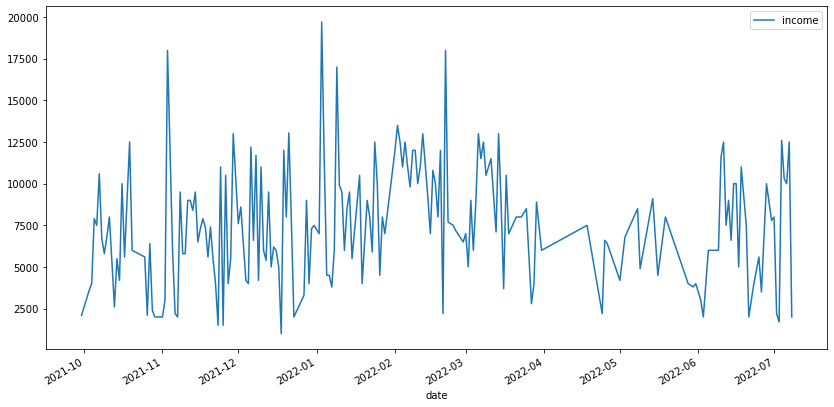

In [9]:
ax = df.plot(figsize=(14, 7))

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

df = scaler.fit_transform(df)

In [11]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train = df[0:train_size,:]
test = df[train_size:len(df),:]

In [12]:
# convert an array of values into a dataset matrix - generating lags from the time series
def create_dataset(df, look_back=1):
    
    dataX, dataY = [], []
    
    for i in range(len(df)-look_back-1):
        a = df[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)
  
  # reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
print(trainX.shape)

(122, 30)


In [14]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [15]:
model=Sequential()

model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='sigmoid', return_sequences=False))

model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

2023-01-31 07:21:06.828556: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
